# DataTrained Practise Project 2
## 1. Red Wine Quality
## 2. Abalone Case Study

Let's start with red wine quality.

# 1. Red Wine Quality

## Problem statement says:
 - classification task
 - the classes are ordered and non balanced
 - not sure if all input variables are relevant

<b> Attribute Information </b>

<b>Input variables (based on physicochemical tests):</b><br>
1 - fixed acidity<br>
2 - volatile acidity<br>
3 - citric acid<br>
4 - residual sugar<br>
5 - chlorides<br>
6 - free sulfur dioxide<br>
7 - total sulfur dioxide<br>
8 - density<br>
9 - pH<br>
10 - sulphates<br>
11 - alcohol<br>
Output variable (based on sensory data):<br>
12 - quality (score between 0 and 10)<br>

<b>What can be done!</b>
 - set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or <br>
    higher getting classified as 'good/1' and the remainder as 'not good/0'<br>
 - practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value<br>
 - need to build a classification model<br>
    
### Need to determine which physiochemical properties make a wine 'good'!

In [6]:
# import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
df.shape

(1599, 12)

We've 1599 rows and 12 columns where quality is label and remaining all are features. 

In [9]:
print('Each column and its datatype,counts')
print(df.info())

Each column and its datatype,counts
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


So,<br> 
 - we've label datatype as integer and features are of float type.
 - don't find any null values('non-null': indicates)<br>

good to go, let's go on.

In [10]:
# let's see stats of my dataset
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<b>My observation says :</b>
 - There is big difference between mean and std which is good. If they are too close then there will be problem.
 - There is slight difference in min and first quantile(25%) which is ok.If there is a too much gap then will be a problem.
 - There is big gap between 3rd quantile(75%) and max which could lead to be problem.
 - I can see count as 1599 in each column it means that I don't have any null values present in my dataset.<br>

But, there is one more thing, here all I can see is numeric values what if dataset contains some string values(like alphabets)<br>
in this case the describe() method won't display nominal data(string//categorical).So, I can't depend only on describe() method.<br>

<b>In this case, it is better to check by isnull() method.</b>

In [11]:
# check null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Here, I get the clear pitcher that there is no null in my dataset.

In [12]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

we've unique values are "5, 6, 7, 4, 8, 3"

In [13]:
# Let's check the count of ecach category of label
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

This seems like the data is <b>imbalanced.</b> Because there are category 7,4,8,3 show the huge difference compare with category 5 & 6.<br>
So let's check the score on imbalanced data first then we'll check on balancedd dataset.

Let's balance data,I'll do oversampling on category 3,4,7,8 of quality column

<function matplotlib.pyplot.show(close=None, block=None)>

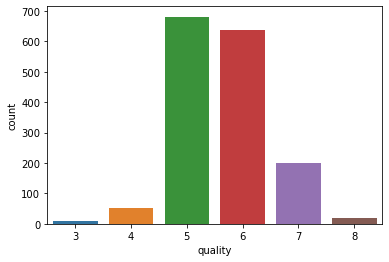

In [14]:
# plot each class frequency in a graph
sns.countplot(x='quality',data=df)
plt.show

Above distribution shows quality ranges from 3 to 8

This shows that the category 5 & 6 has higher bar than others.It means cat 5 & 6 defines good quality of wine.<br>
Let's say quality 5&6 are superior and other inferior,fine

In [15]:
conditions = [df['quality']>=7,df['quality']<=4]
ratings = ['Superior','Inferior']
df['ratings'] = np.select(conditions,ratings,default='fine')
df.ratings.value_counts()

fine        1319
Superior     217
Inferior      63
Name: ratings, dtype: int64

This shows that, fine quality wine has count 1319,superior quality wine has count 217 & inferior quality of wine has count 63.

In [16]:
# let's check the mean of each fine,superior,inferior type so I can check which attribute affects.
df.groupby('ratings').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
ratings,,,,,,,,,,,,
Inferior,7.871429,0.724206,0.173651,2.684921,0.095730,12.063492,34.444444,0.996689,3.384127,0.592222,10.215873,3.841270
Superior,8.847005,0.405530,0.376498,2.708756,0.075912,13.981567,34.889401,0.996030,3.288802,0.743456,11.518049,7.082949
fine,8.254284,0.538560,0.258264,2.503867,0.088973,16.368461,48.946929,0.996867,3.311296,0.647263,10.252717,5.483700


Here, I can see which attribute affects the quality of wine.But not a very clear pitcher.So,let's visualize by ploting graph.

## Visualization

Here we can some skewness in the datatset.<br>
Let's plot the heatmap to check the correlation between label and variable

<AxesSubplot:>

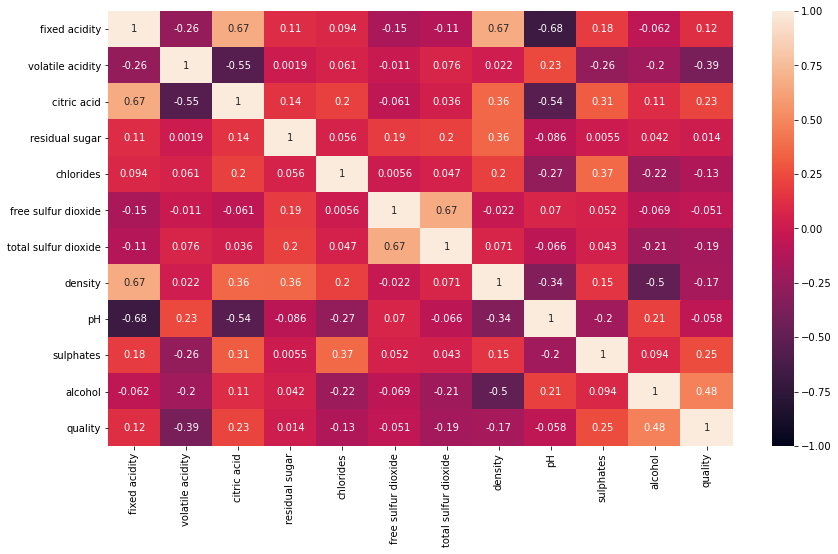

In [17]:
correlation = df.corr()
plt.figure(figsize=(14,8))
sns.heatmap(correlation,annot=True,linewidths=0,vmin=-1,vmax=1)

Here I can see that 'alcohol' is highly correlated with wine and 'free sulphur dioxide' is least correlated with wine.

In [18]:
# I want to check what all fators affects the quality of wine
correlation['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

This can be conclude as 'alcohol' is high correlation with quality whereas the 'volatile acidity' is least.

let's plot a box plot of quality with other attribute. 

## Alcohol Vs Wine

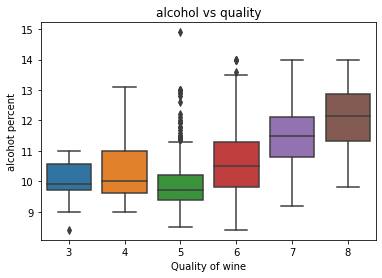

In [19]:
bx = sns.boxplot(x='quality',y='alcohol',data=df)
plt.xlabel('Quality of wine')
plt.ylabel('alcohot percent')
plt.title('alcohol vs quality')
plt.show()

## sulphates vs ratings 

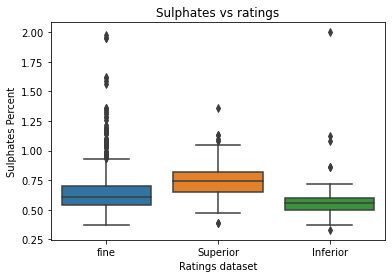

In [20]:
bx = sns.boxplot(x='ratings',y='sulphates',data=df)
plt.xlabel('Ratings dataset')
plt.ylabel('Sulphates Percent')
plt.title('Sulphates vs ratings')
plt.show()

## citric acid vs ratings dataset

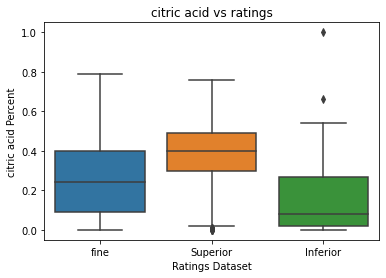

In [21]:
bx = sns.boxplot(x='ratings',y='citric acid',data=df)
plt.xlabel('Ratings Dataset')
plt.ylabel('citric acid Percent')
plt.title('citric acid vs ratings')
plt.show()

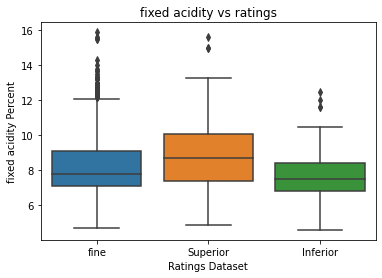

In [22]:
bx = sns.boxplot(x='ratings',y='fixed acidity',data=df)
plt.xlabel('Ratings Dataset')
plt.ylabel('fixed acidity Percent')
plt.title('fixed acidity vs ratings')
plt.show()

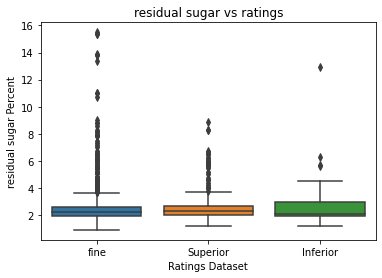

In [23]:
bx = sns.boxplot(x='ratings',y='residual sugar',data=df)
plt.xlabel('Ratings Dataset')
plt.ylabel('residual sugar Percent')
plt.title('residual sugar vs ratings')
plt.show()

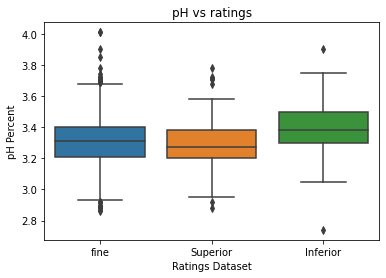

In [24]:
bx = sns.boxplot(x='ratings',y='pH',data=df)
plt.xlabel('Ratings Dataset')
plt.ylabel('pH Percent')
plt.title('pH vs ratings')
plt.show()

Here, I can say that the boxes are reducing so, if I keep plotting graph after the pH attribute, the boxes size will be reduced.So I stopped at pH attribute.

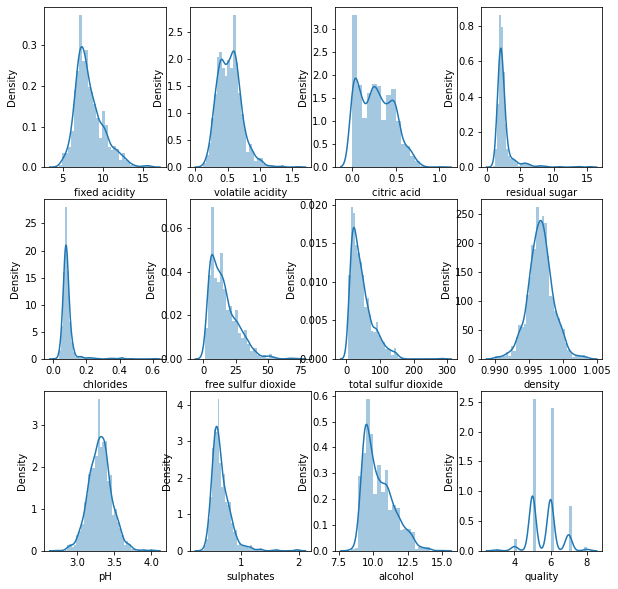

In [25]:
# let's see how the data is distributed.
plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=10)
        
    plotnumber += 1
plt.show()

I can see some skewness in the dataset, let's try to remove it.

In [26]:
# removing skewness

q = df['residual sugar'].quantile(0.95)  # cleaned top 5%
data_cleaned = df[df['residual sugar']<q]

q = df['chlorides'].quantile(0.96)  # cleaned top 4%
data_cleaned = df[df['chlorides']<q]

q = df['free sulfur dioxide'].quantile(0.99)  # cleaned top 1%
data_cleaned = df[df['free sulfur dioxide']<q]

q = df['total sulfur dioxide'].quantile(0.99)  # cleaned top 1%
data_cleaned = df[df['total sulfur dioxide']<q]

q = df['sulphates'].quantile(0.99)  # cleaned top 1%
data_cleaned = df[df['sulphates']<q]

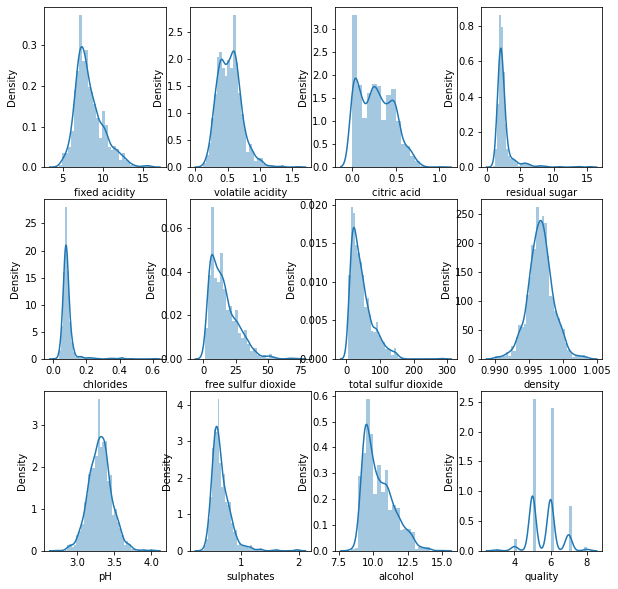

In [27]:
# let's see how the data is distributed after removing skewness
plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=10)
        
    plotnumber += 1
plt.show()

The data looks better now, let's check the relationship of independent variable and dependent variable.

In [28]:
X = df.drop(columns = ['quality','ratings'])
y = df['quality']

In [29]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [30]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

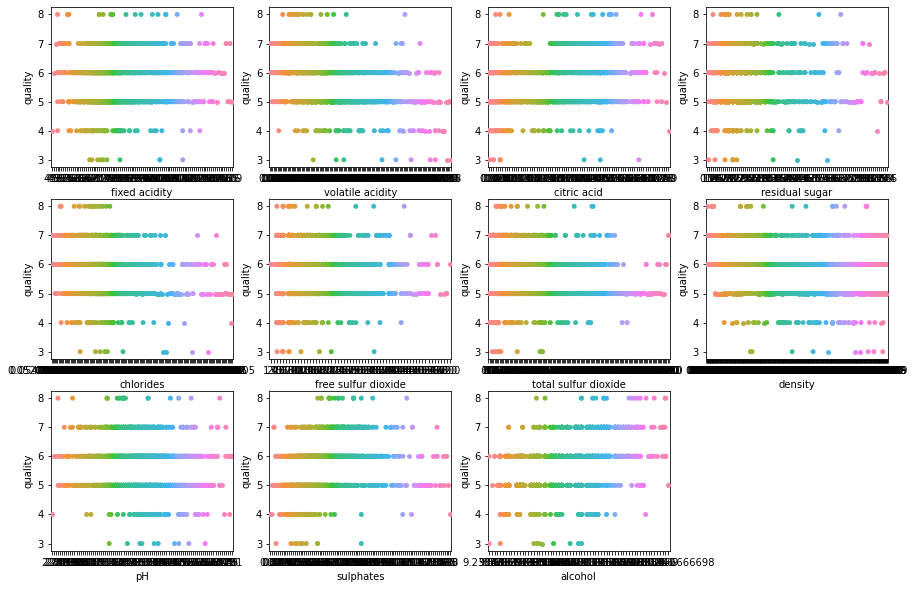

In [31]:
# let's plot a box plot to see the relationship.
plt.figure(figsize=(15,10),facecolor='white')
plotnumber=1
for column in X:
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)
        sns.stripplot(X[column],y)
        
    plotnumber += 1
plt.show()

 - The quality of 5&6 class is having the highest no. of  fixed acidity,citrix acid,density & alcohol.

In [32]:
# scaled the data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [33]:
X_scaled.shape

(1599, 11)

So, our data is scaled now.Let's find the varience inflation factor for each scaled data and store them

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif['features'] = X.columns

In [35]:
vif

,vif,features
0,7.767512,fixed acidity
1,1.789390,volatile acidity
2,3.128022,citric acid
3,1.702588,residual sugar
4,1.481932,chlorides
5,1.963019,free sulfur dioxide
6,2.186813,total sulfur dioxide
7,6.343760,density
8,3.329732,pH
9,1.429434,sulphates


All vif values are less than 5 except fixed acidity & density, seems like a multicollinearity problem.Let's see,how can we solve it

In [36]:
df.shape

(1599, 13)

## Using SelectKBext feature selection method

SelectKBest feature use f_classif function to find best feature where f_classif uses ANOVA test.

In [37]:
from sklearn.feature_selection import SelectKBest, f_classif

In [38]:
best_features = SelectKBest(score_func=f_classif, k=8)
fit = best_features.fit(X,y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

# concat DataFrame
feature_score = pd.concat([df_columns,df_scores],axis=1)
feature_score.columns = ['Feature Name','Score']
print(feature_score.nlargest(8,'Score'))                    # print best features

            Feature Name       Score
10               alcohol  115.854797
1       volatile acidity   60.913993
6   total sulfur dioxide   25.478510
9              sulphates   22.273376
2            citric acid   19.690664
7                density   13.396357
0          fixed acidity    6.283081
4              chlorides    6.035639


The 'alcohol' is the best feature for good wine quality. 

<function matplotlib.pyplot.show(close=None, block=None)>

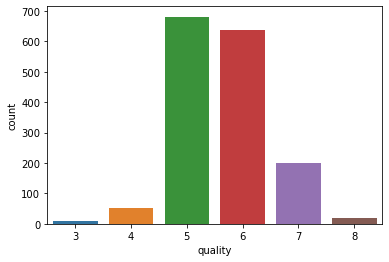

In [39]:
# plot each class frequency in a graph
sns.countplot(x='quality',data=df)
plt.show

Shows the quality of 5 is too high bar. There is a imbalanced dataset let's oversampling it.

## Model Building

## K-Nearest Neighbor(KNN)

In [40]:
from sklearn.neighbors import KNeighborsClassifier
# buildind a model to test unexposed data
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,random_state=255)
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report
cfm = confusion_matrix(y_test,y_test)
cfm

array([[  1,   0,   0,   0,   0,   0],
       [  0,  12,   0,   0,   0,   0],
       [  0,   0, 174,   0,   0,   0],
       [  0,   0,   0, 160,   0,   0],
       [  0,   0,   0,   0,  51,   0],
       [  0,   0,   0,   0,   0,   2]], dtype=int64)

In [42]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.17      0.08      0.11        12
           5       0.65      0.67      0.66       174
           6       0.54      0.59      0.56       160
           7       0.45      0.37      0.41        51
           8       0.00      0.00      0.00         2

    accuracy                           0.58       400
   macro avg       0.30      0.29      0.29       400
weighted avg       0.56      0.58      0.57       400



In [43]:
# Oversampling


In [44]:
pip install imbalanced-learn

In [45]:
from imblearn.over_sampling import SMOTE

In [47]:
import pandas as pd
x = pd.concat([X_train,y_train],axis=1)

TypeError: cannot concatenate object of type '<class 'numpy.ndarray'>'; only Series and DataFrame objs are valid

In [1]:
from sklearn.utis import resample
upsampled = resample(quality,replace=True,n_samples=len(X.quality==4,random_state))
upsampled

ModuleNotFoundError: No module named 'sklearn.utis'

## LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

The model has been built

In [ ]:
y_pred = lr.predict(X_test)
accuracy_score(y_test, y_pred)

Logistic regression gives 59.5% accuracy.let's biuld other model n check accuracy.

## DecisionTreeClassifier

In [60]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [61]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [62]:
pred = dt.predict(X_test)
accuracy_score(y_test,pred)

0.62

## RandomForestClassifier

In [57]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
pred = rf.predict(X_test)
accuracy_score(y_test,pred)

0.6975

Hence, inspite of logistics regression, Decision Tree, the Random Forest gives better accuracy 69.75%.

In [70]:
# save a model
import pickle
s = pickle.dumps(rf)
a = pickle.dumps(dt)

In [ ]:
Hence model is saved.